In [1]:
### import importlib
import sys
import os
import nltk
import pandas as pd
import networkx as nx

# Add the 'src' directory to the system path
sys.path.append(os.path.abspath('../src'))
src_path = os.path.abspath('../src')

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jorge.mayorga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jorge.mayorga/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jorge.mayorga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Import classes from the modules using their correct filenames
from DataLoaderClass import DataLoader

In [3]:
# Initialize paths
BIB_FILE_PATH = '../examples/EX1_POWER_SYSTEM_FPGA_FREQUENCY_ESTIMATORS/index.bib'
PDF_FOLDER_PATH = '../examples/EX1_POWER_SYSTEM_FPGA_FREQUENCY_ESTIMATORS/files'

In [4]:
# Step 1: Data Loading and Processing
loader = DataLoader(BIB_FILE_PATH, PDF_FOLDER_PATH)
processed_data = loader.load_and_process()


Matching process completed.
Total references matched: 31 out of 31
Unmatched References: 0

Unmatched PDF Folders: 0


In [5]:
# -------------------------------------------------------------- #
# -- EDA M3 :: Sources ----------------------------------------- #
# -------------------------------------------------------------- #
from eda.m3_sources_analysis import Processor
from eda.m3_sources_analysis import Visualizer
from eda.m3_sources_analysis import Reporter
# -------------------------------------------------------------- #

# Data
data = processed_data

# Process data
processor = Processor(data)
visualizer = Visualizer()
reporter = Reporter()

In [6]:
#################################################################################
### Function 1 => Top Sources and Publishers (Barplot & Table)
#################################################################################

### **Indicator: Top Sources and Publishers**

This indicator identifies the journals or publishers that contribute the most documents to the dataset. By ranking sources by their document count, this analysis highlights the key venues in the discipline.

#### **How to Interpret**
- **Bar Chart**: Displays the top journals or publishers contributing to the topic.
- **Insights**: Journals or publishers with a higher document count likely have a greater focus or impact on the topic.


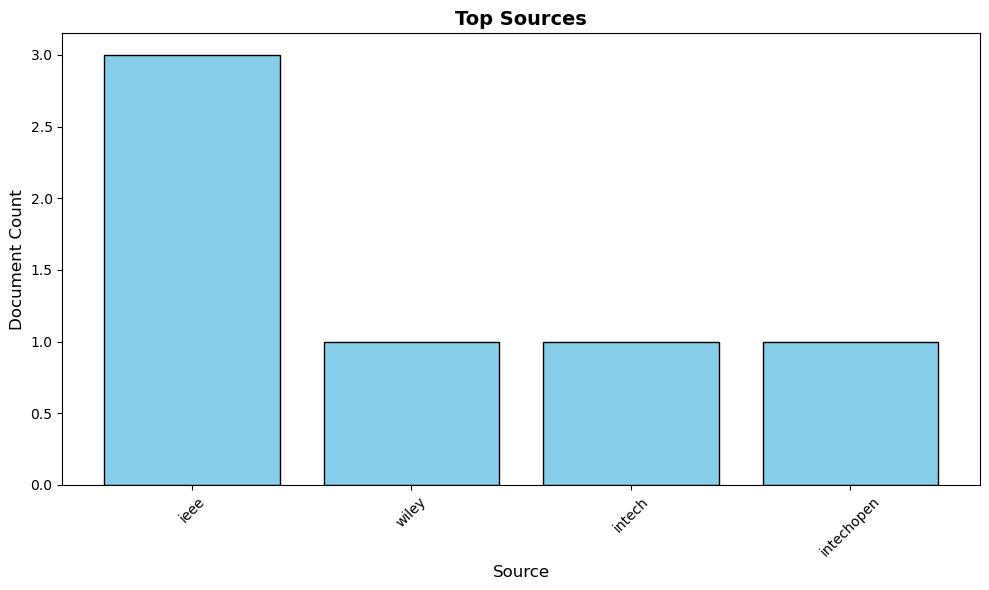

Saved to ../output/m2_authors/top_sources.csv


,Source,Document Count
0,ieee,3
1,wiley,1
2,intech,1
3,intechopen,1


In [7]:
# Step 2: Get the top sources
top_sources = processor.get_top_sources(n=10)

# Step 3: Visualize the top sources
Visualizer.plot_bar_chart(
    df=top_sources,
    title="Top Sources",
    filename="top_sources",
    x_col="Source",
    y_col="Document Count"
)

# Step 4: Save the table
Reporter.save_to_csv(top_sources, "top_sources")

# Step 5: Display the table in the notebook
top_sources

In [8]:
top_sources

,Source,Document Count
0,ieee,3
1,wiley,1
2,intech,1
3,intechopen,1


In [9]:
#################################################################################
### Function 2 => Proportion of Articles in High-Impact Journals (Pie Chart & Table)
#################################################################################

### **Indicator: Proportion of Articles in High-Impact Journals**

This indicator analyzes the dataset to determine the proportion of articles published in high-impact journals. High-impact journals are identified from a predefined list or external rankings, helping highlight the dataset's relevance to key academic venues.

#### **How to Interpret**
- **Pie Chart**: Shows the percentage of articles in high-impact journals vs. other journals.
- **Insights**: A higher proportion of articles in high-impact journals suggests the dataset's focus on reputable academic sources.


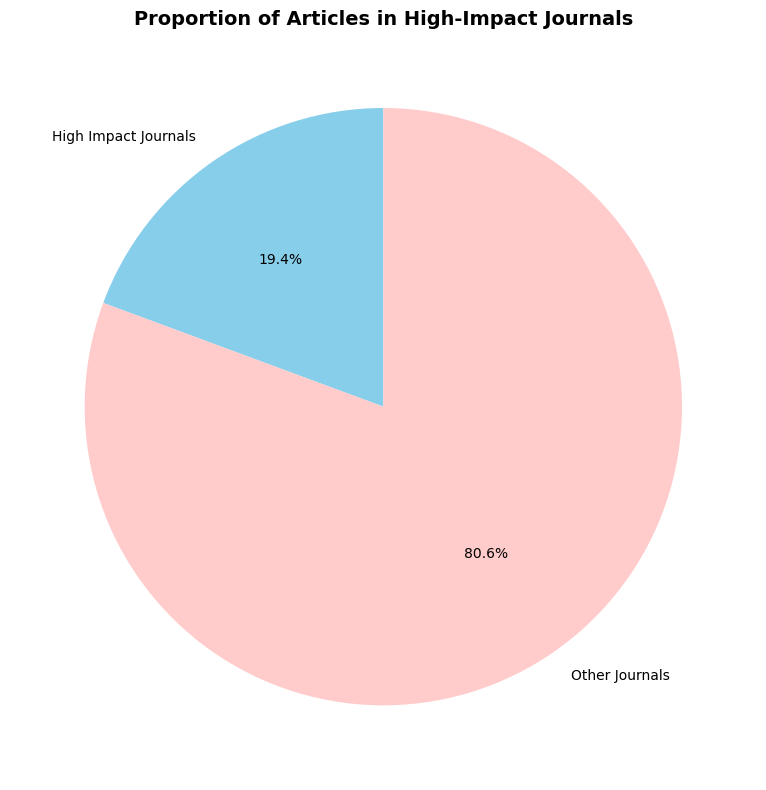

Saved to ../output/m2_authors/high_impact_proportion.csv
Dynamic High-Impact Journals List:
['ieee', 'wiley', 'intech', 'intechopen']
High-Impact Proportion Table:


,Category,Article Count
0,High Impact Journals,6
1,Other Journals,25


In [10]:
# Step 1: Calculate high-impact proportions and unpack the tuple
high_impact_proportion, dynamic_high_impact_list = processor.calculate_high_impact_proportion(n=5)

# Step 2: Visualize the proportions
Visualizer.plot_pie_chart(
    df=high_impact_proportion,  # Use the unpacked DataFrame
    title="Proportion of Articles in High-Impact Journals",
    filename="high_impact_proportion",
    labels_col="Category",
    values_col="Article Count"
)

# Step 3: Save the table
Reporter.save_to_csv(high_impact_proportion, "high_impact_proportion")

# Display the dynamic high-impact list and the proportion table
print("Dynamic High-Impact Journals List:")
print(dynamic_high_impact_list)

print("High-Impact Proportion Table:")
high_impact_proportion